#Bike sharing analysis Using Linear Regression

# Objective  
The objective of this project is to analyze the bike sharing dataset and build a linear regression model to predict the demand for shared bikes. The project also includes feature scaling, data visualization, and evaluation of the model using error metrics such as MAE, RMSE, and R2 score.


## Importing Libraries  

The necessary Python libraries are imported to handle data, visualization, preprocessing, and model building.  
- os: for handling file paths  
- pandas: for data manipulation and analysis  
- urllib.request: to download the dataset  
- zipfile: to extract the dataset if compressed  
- seaborn and matplotlib: for data visualization  
- sklearn.model_selection: to split the dataset into training and testing sets  
- sklearn.linear_model: to build the linear regression model  
- sklearn.preprocessing: for feature scaling  
- sklearn.metrics: to evaluate the performance of the model  


In [52]:
import os
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## Loading the Dataset  

The dataset is downloaded from the given URL and saved locally as a zip file.  
If the file is not already present, it is retrieved using urlretrieve.  
The zip file is then extracted, and the CSV file day.csv is read into a pandas DataFrame.  
The first few rows of the dataset are displayed using df.head().  


In [16]:
zip_url = "https://samatrix-data.s3.ap-south-1.amazonaws.com/ML/Data-Bike-Share.zip"
local_zip = "bike.zip"
if not os.path.exists(local_zip):
    urlretrieve(zip_url, local_zip)

with zipfile.ZipFile(local_zip) as z:
    with z.open("day.csv") as f:
        df = pd.read_csv(f)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Dataset Information  

The df.info() function is used to display summary of the dataset.  
It shows the column names, number of non-null values, and data types for each column.  
This helps in understanding the structure of the dataset and checking for any missing values.  


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Dataset Statistics  

The df.describe() function generates descriptive statistics for the dataset.  
It provides insights such as:  
- Count of non-null values  
- Mean, standard deviation  
- Minimum and maximum values  
- 25th, 50th (median), and 75th percentiles  



In [18]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Missing Values Check  

The df.isnull().sum() function checks for missing values in each column of the dataset.  
If all values are zero, it indicates that the dataset does not contain any missing data and is clean for analysis.  


In [19]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


## Pairplot Visualization  

The plot helps in:  
- Identifying correlations between features.  
- Detecting linear or non-linear trends.  
- Observing potential outliers.  

From the pairplot, it can be seen that the target variable cnt (total count of bike rentals) shows a positive relationship with predictors like temp and atemp, while other variables display weaker or no clear correlation.  


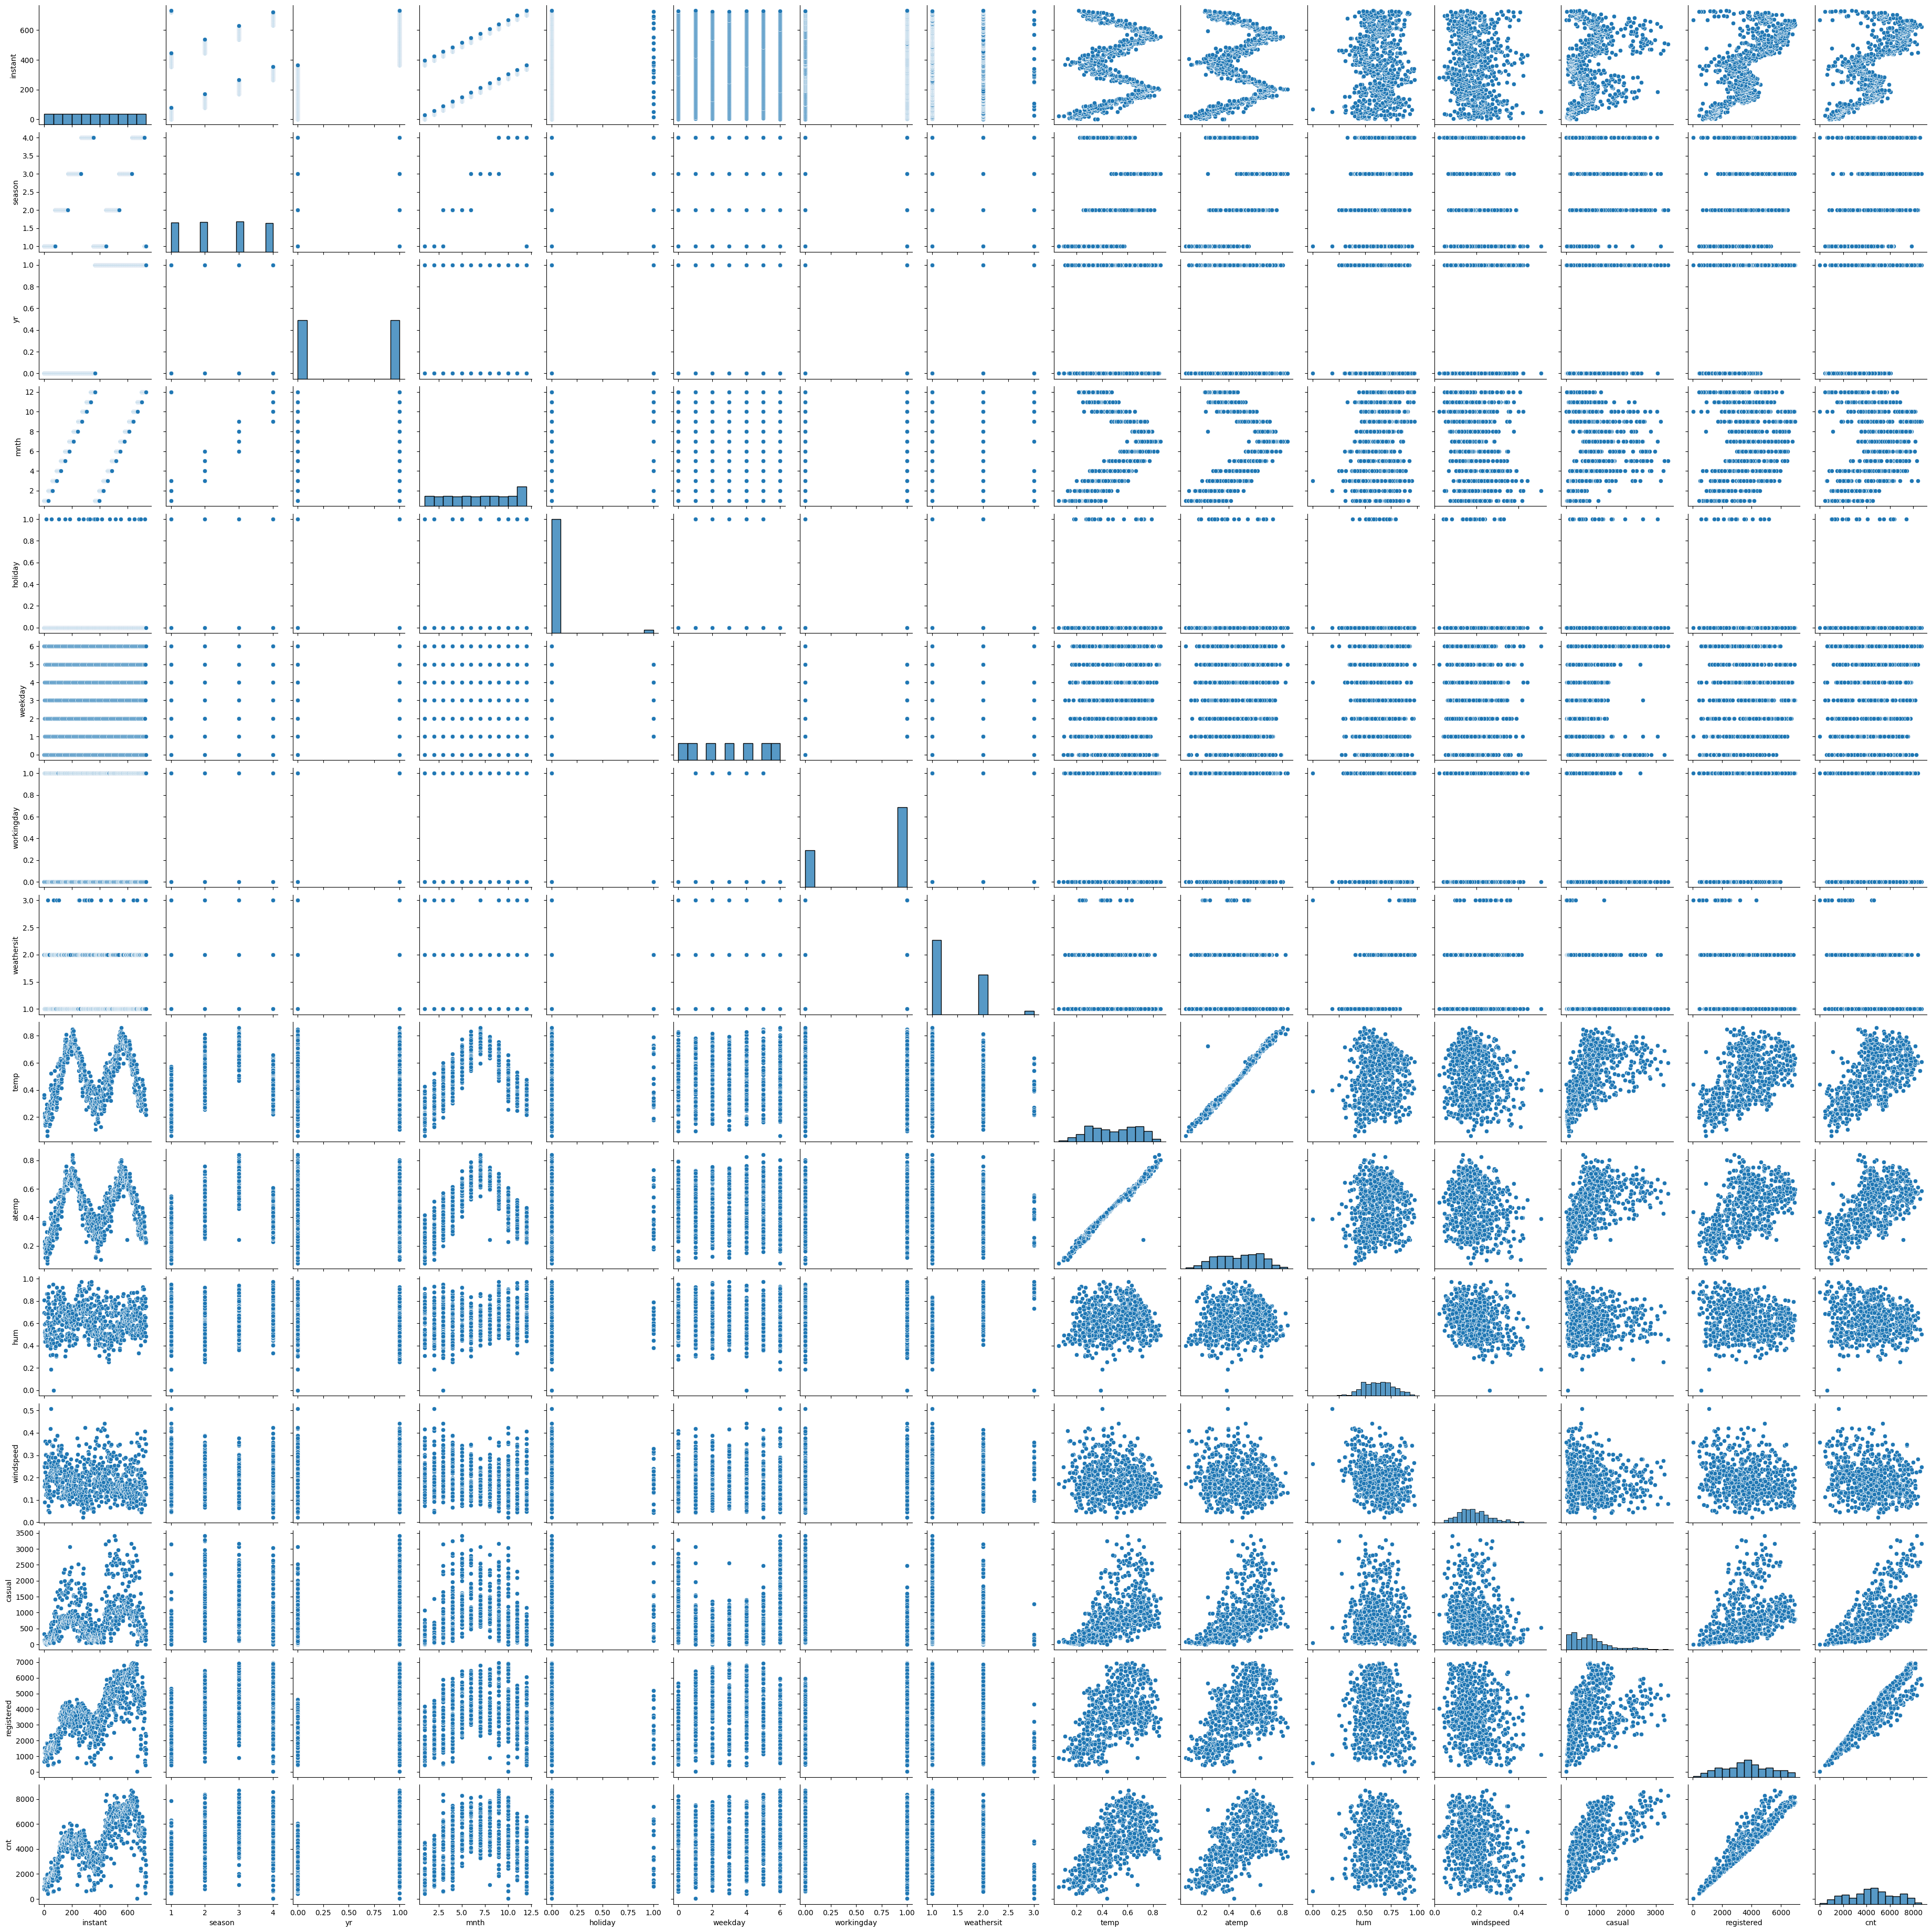

In [20]:
sns.pairplot(df)

## Datetime Conversion  

The dteday column was converted from string format to datetime using pd.to_datetime().  




In [21]:
df['dteday'] = pd.to_datetime(df['dteday'])

## Boxplot Visualization  

Boxplots were plotted for the categorical features against the target variable cnt (total count of bike rentals).  


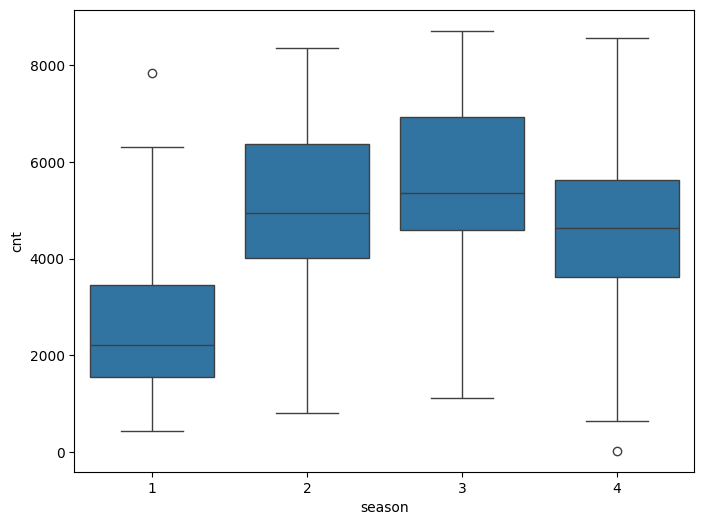

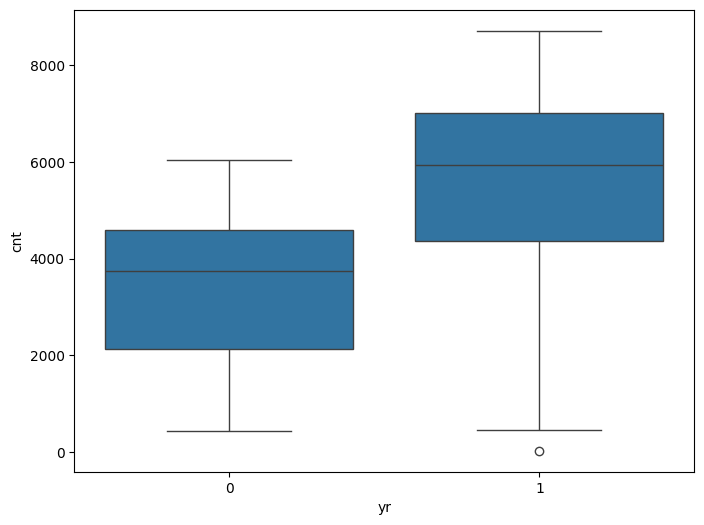

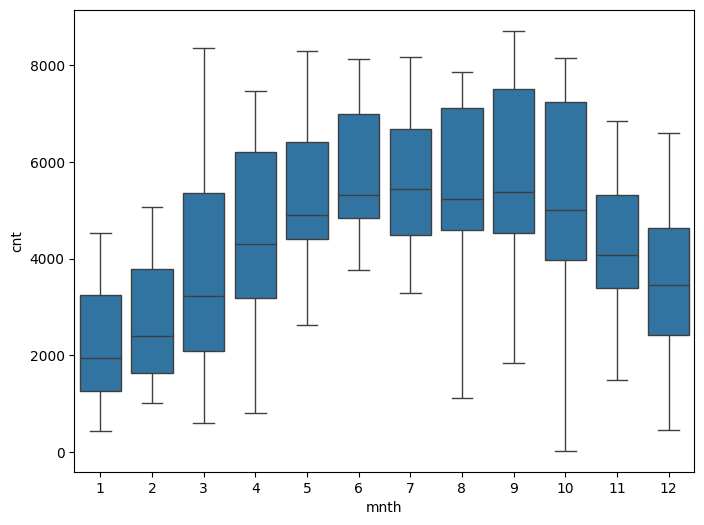

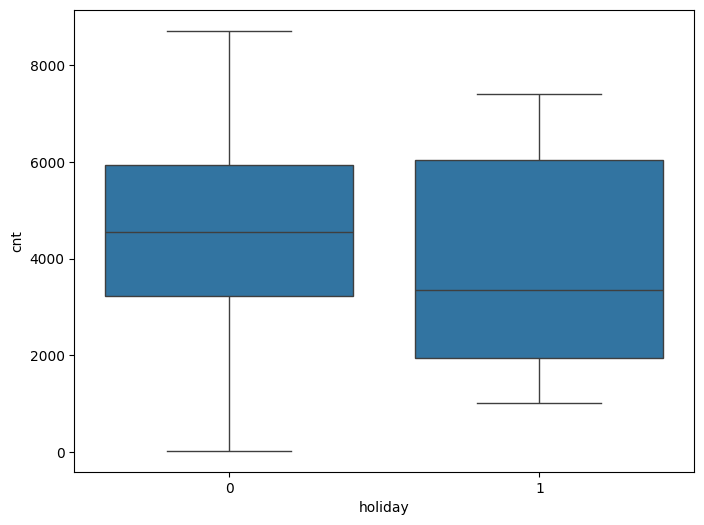

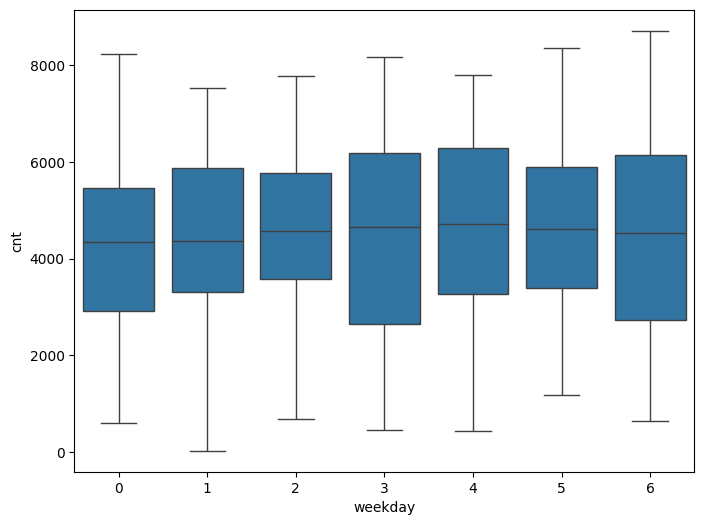

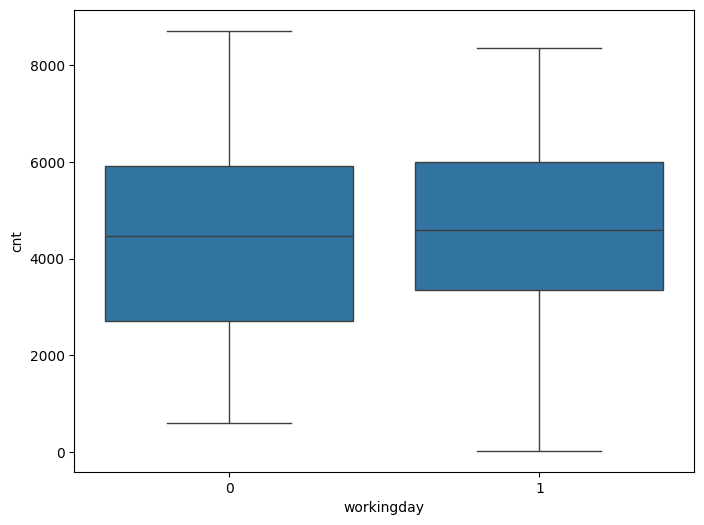

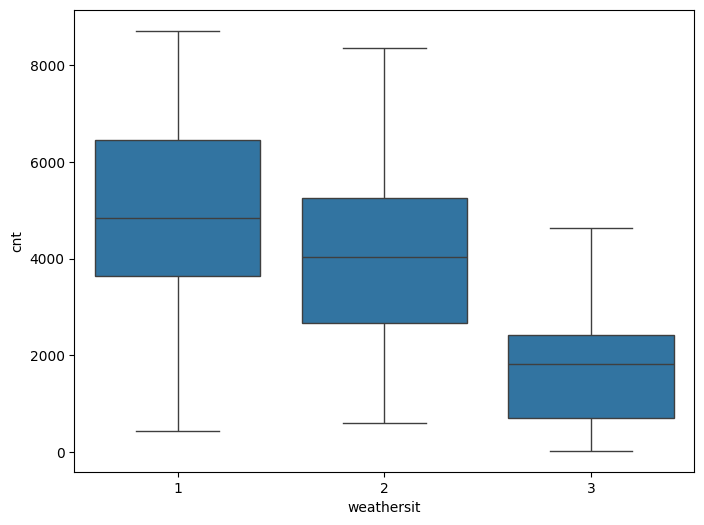

In [23]:
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
target_variable = 'cnt'

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y=target_variable, data=df)
    plt.show()

## Correlation Heatmap  

A correlation heatmap was generated to examine the linear relationships between numerical variables in the dataset.  

The heatmap helps in:  
- Identifying multicollinearity among predictors.  
- Highlighting strong positive or negative correlations.  
- Selecting relevant features for modeling.  




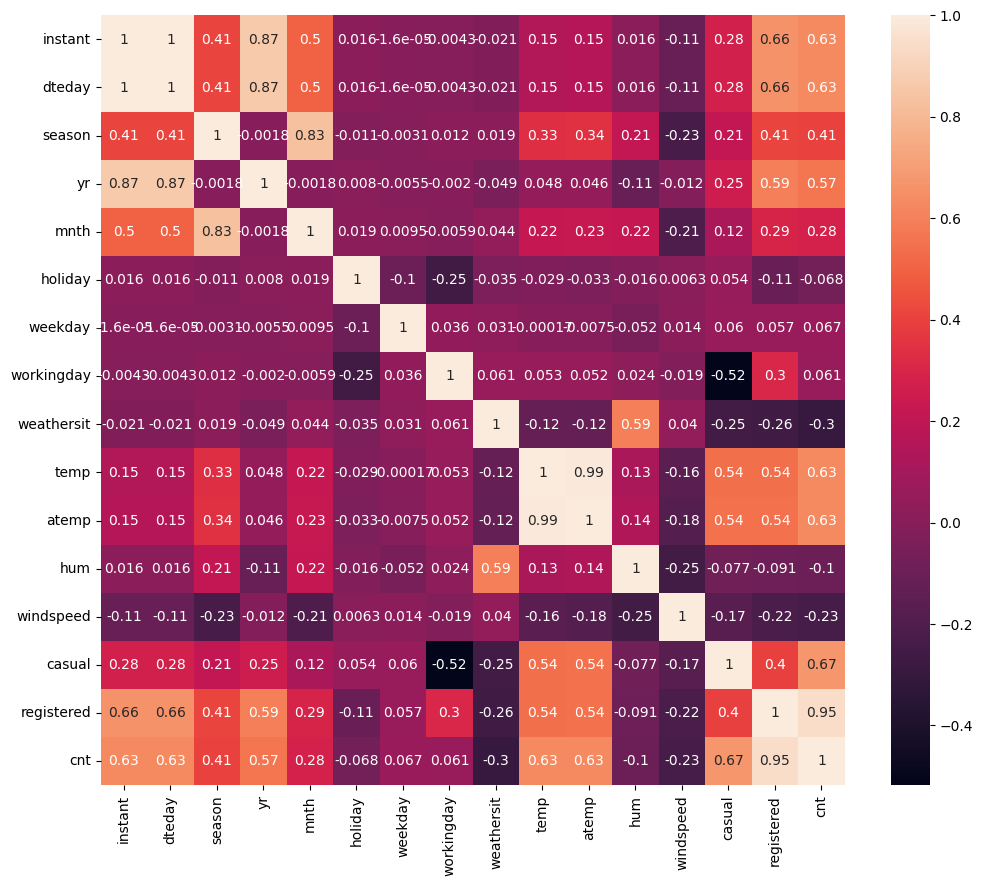

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Train-Test Split and Feature Selection  

For model training, the target variable cnt (total count of bike rentals) was separated from the predictors.  
  
1. Feature Selection:  
   Excluded irrelevant or derived columns such as yr, mnth, holiday, weekday, workingday, dteday, casual, and registered to avoid data leakage and redundancy.  

2. Target Variable:  
   cnt was chosen as the dependent variable for prediction.  

3. Train-Test Split:  
   The dataset was split into training and testing sets using an 80-20 ratio.  
   Training Set  80% of the data (used for model training).  
   Testing Set  20% of the data (used for evaluating performance).  
   Random state fixed at 42 for reproducibility.  


In [57]:
x = df.drop(columns=['cnt','yr','mnth','holiday','weekday','workingday','dteday','casual','registered'])
y = df['cnt']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Feature Scaling  

Before training the regression model, feature scaling was applied to standardize the predictors.  

1. Fit and transform the training data (X_train).  
2. Transform the testing data (X_test) using the same scaler.  




In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

## Model Training and Prediction  

Linear Regression model was trained using the scaled training dataset.  
After fitting the model, predictions were made on the scaled test dataset.  

In [59]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

##Model Evaluation Metrics

- Mean Squared Error (MSE): The average of the squared differences between predicted and actual values. Smaller is better.  
- Root Mean Squared Error (RMSE): The square root of MSE, interpretable in the same units as the target variable. Smaller is better.  
- Mean Absolute Error (MAE): The average of the absolute differences between predicted and actual values. Smaller is better.  
- R-squared (R2): Indicates how well the model explains the variance in the data. Closer to 1 means better performance.  


In [60]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 939591.9817973677
Root Mean Squared Error (RMSE): 969.3255293230276
Mean Absolute Error (MAE): 718.4376572203433
R-squared (R2): 0.7656809067756225


##Residuals Plot

A residuals plot was created to visualize the difference between predicted and actual values for the Linear Regression model.



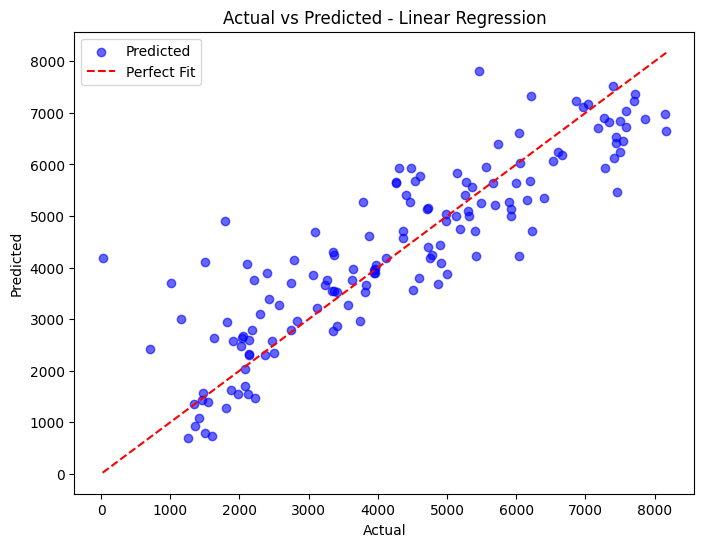

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Linear Regression")
plt.legend()
plt.show()

##Conclusion

This project focused on analyzing and predicting daily bike rental demand using Linear Regression. The dataset included features such as season, weather conditions, temperature, humidity, and day types (working day, holiday, etc.). The goal was to build a model that could estimate the total number of bikes rented each day based on these variables.

Exploratory Data Analysis showed that certain features, like temperature, season, and weather conditions, have a strong impact on bike rental counts. Visualization techniques such as correlation heatmaps, box plots, and pairplots helped identify relationships between features and the target variable.

The Linear Regression model was trained on the dataset after splitting it into training and testing sets. After scaling the features, the model produced predictions that were evaluated using multiple metrics. The R-squared value of 0.76 indicates that the model explains about 76% of the variation in bike rentals. The Mean Absolute Error (MAE) was approximately 718, and the Root Mean Squared Error (RMSE) was around 969, indicating that the model’s predictions are reasonably close to the actual values. Residual plots and actual vs predicted plots confirmed that most predictions are near the actual values, though some variability remains.


